In [183]:
import sys, os
import matplotlib.pyplot as plt
import requests
import json
import pandas as pd
from pandas.io import sql
from pandas.io.json import json_normalize
import numpy as np
from sqlalchemy import types, create_engine
from datetime import date, timedelta
from datetime import datetime
import time
import re
import pylab as py
from matplotlib import gridspec
import matplotlib.dates as md
from sklearn.model_selection import LeaveOneOut
os.environ['PROJ_LIB'] = '/home/ehsan/anaconda3/share/proj'
import matplotlib

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from scipy.optimize import minimize
from scipy.optimize import curve_fit

Text(0, 0.5, '# of days')

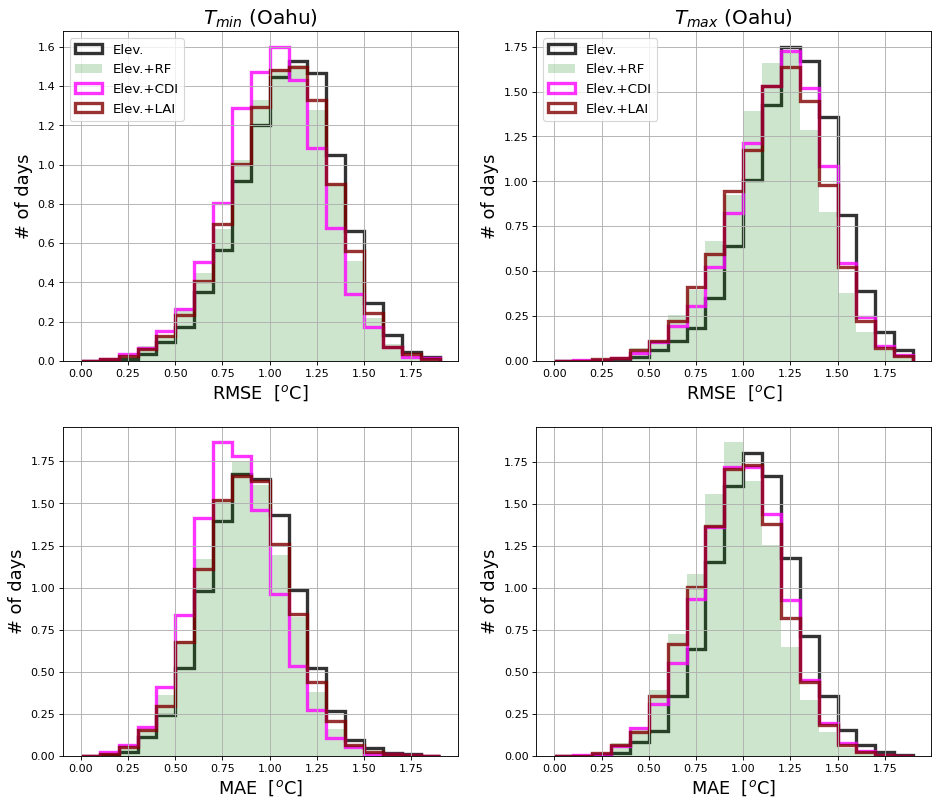

In [185]:
fig = plt.figure(figsize=(14, 12), dpi=80)
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

#########################################################################################

fp1 = pd.read_csv("KF5/KF5_Tmin_Elev_OA_hyper.csv", sep=',')
fp2 = pd.read_csv("KF5/KF5_Tmin_Elev_RF_OA_hyper.csv", sep=',')
fp3 = pd.read_csv("KF5/KF5_Tmin_Elev_CDI_OA_hyper.csv", sep=',')
fp4 = pd.read_csv("KF5/KF5_Tmin_Elev_LAI_OA_hyper.csv", sep=',')

bins = np.arange(0,2,0.1)

fp1.RMSE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='k', label='Elev.', ax=ax1) # blue
fp2.RMSE.hist(bins=bins, density=True, alpha=0.2, lw=3, color='g', label='Elev.+RF', ax=ax1)
fp3.RMSE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='magenta', label='Elev.+CDI', ax=ax1)
fp4.RMSE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='maroon', label='Elev.+LAI', ax=ax1) # blue

ax1.set_title(r'$T_{min}$'+' (Oahu)', fontsize=18)
ax1.set_xlabel('RMSE  ['+r'$^o$'+'C]', fontsize=16)
ax1.set_ylabel('# of days', fontsize=16)
ax1.legend(loc=2, fontsize=12)

#########################################################################################

fp1 = pd.read_csv("KF5/KF5_Tmax_Elev_OA_hyper.csv", sep=',')
fp2 = pd.read_csv("KF5/KF5_Tmax_Elev_RF_OA_hyper.csv", sep=',')
fp3 = pd.read_csv("KF5/KF5_Tmax_Elev_CDI_OA_hyper.csv", sep=',')
fp4 = pd.read_csv("KF5/KF5_Tmax_Elev_LAI_OA_hyper.csv", sep=',')

bins = np.arange(0,2,0.1)

fp1.RMSE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='k', label='Elev.', ax=ax2) # blue
fp2.RMSE.hist(bins=bins, density=True, alpha=0.2, lw=3, color='g', label='Elev.+RF', ax=ax2)
fp3.RMSE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='magenta', label='Elev.+CDI', ax=ax2)
fp4.RMSE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='maroon', label='Elev.+LAI', ax=ax2) # blue

ax2.set_title(r'$T_{max}$'+' (Oahu)', fontsize=18)
ax2.set_xlabel('RMSE  ['+r'$^o$'+'C]', fontsize=16)
ax2.set_ylabel('# of days', fontsize=16)
ax2.legend(loc=2, fontsize=12)

#########################################################################################

fp1 = pd.read_csv("KF5/KF5_Tmin_Elev_OA_hyper.csv", sep=',')
fp2 = pd.read_csv("KF5/KF5_Tmin_Elev_RF_OA_hyper.csv", sep=',')
fp3 = pd.read_csv("KF5/KF5_Tmin_Elev_CDI_OA_hyper.csv", sep=',')
fp4 = pd.read_csv("KF5/KF5_Tmin_Elev_LAI_OA_hyper.csv", sep=',')

bins = np.arange(0,2,0.1)

fp1.MAE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='k', label='Elev.', ax=ax3) # blue
fp2.MAE.hist(bins=bins, density=True, alpha=0.2, lw=3, color='g', label='Elev.+RF', ax=ax3)
fp3.MAE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='magenta', label='Elev.+CDI', ax=ax3)
fp4.MAE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='maroon', label='Elev.+LAI', ax=ax3) # blue

# ax3.set_title(r'$T_{min}$'+' (Oahu)', fontsize=18)
ax3.set_xlabel('MAE  ['+r'$^o$'+'C]', fontsize=16)
ax3.set_ylabel('# of days', fontsize=16)
# ax3.legend(loc=2, fontsize=12)

#########################################################################################

fp1 = pd.read_csv("KF5/KF5_Tmax_Elev_OA_hyper.csv", sep=',')
fp2 = pd.read_csv("KF5/KF5_Tmax_Elev_RF_OA_hyper.csv", sep=',')
fp3 = pd.read_csv("KF5/KF5_Tmax_Elev_CDI_OA_hyper.csv", sep=',')
fp4 = pd.read_csv("KF5/KF5_Tmax_Elev_LAI_OA_hyper.csv", sep=',')

bins = np.arange(0,2,0.1)

fp1.MAE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='k', label='Elev.', ax=ax4) # blue
fp2.MAE.hist(bins=bins, density=True, alpha=0.2, lw=3, color='g', label='Elev.+RF', ax=ax4)
fp3.MAE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='magenta', label='Elev.+CDI', ax=ax4)
fp4.MAE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='maroon', label='Elev.+LAI', ax=ax4) # blue


# ax4.set_title(r'$T_{max}$'+' (Oahu)', fontsize=18)
ax4.set_xlabel('MAE  ['+r'$^o$'+'C]', fontsize=16)
ax4.set_ylabel('# of days', fontsize=16)
# ax4.legend(loc=2, fontsize=12)

Text(0, 0.5, '# of days')

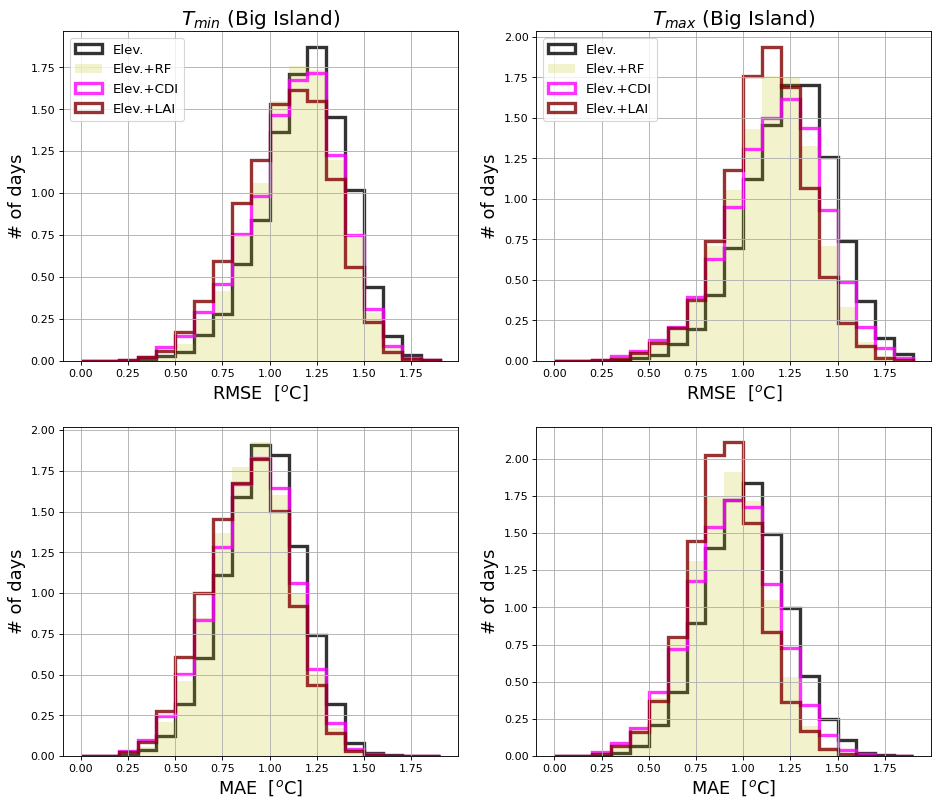

In [186]:
fig = plt.figure(figsize=(14, 12), dpi=80)
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)


fp1 = pd.read_csv("KF5/KF5_Tmin_Elev_BI_hyper.csv", sep=',')
fp2 = pd.read_csv("KF5/KF5_Tmin_Elev_RF_BI_hyper.csv", sep=',')
fp3 = pd.read_csv("KF5/KF5_Tmin_Elev_CDI_BI_hyper.csv", sep=',')
fp4 = pd.read_csv("KF5/KF5_Tmin_Elev_LAI_BI_hyper.csv", sep=',')

bins = np.arange(0,2,0.1)

fp1.RMSE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='k', label='Elev.', ax=ax1) # blue
fp2.RMSE.hist(bins=bins, density=True, alpha=0.2, lw=3, color='y', label='Elev.+RF', ax=ax1)
fp3.RMSE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='magenta', label='Elev.+CDI', ax=ax1)
fp4.RMSE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='maroon', label='Elev.+LAI', ax=ax1) # blue

ax1.set_title(r'$T_{min}$'+' (Big Island)', fontsize=18)
ax1.set_xlabel('RMSE  ['+r'$^o$'+'C]', fontsize=16)
ax1.set_ylabel('# of days', fontsize=16)
ax1.legend(loc=2, fontsize=12)

#########################################################################################

fp1 = pd.read_csv("KF5/KF5_Tmax_Elev_BI_hyper.csv", sep=',')
fp2 = pd.read_csv("KF5/KF5_Tmax_Elev_RF_BI_hyper.csv", sep=',')
fp3 = pd.read_csv("KF5/KF5_Tmax_Elev_CDI_BI_hyper.csv", sep=',')
fp4 = pd.read_csv("KF5/KF5_Tmax_Elev_LAI_BI_hyper.csv", sep=',')

bins = np.arange(0,2,0.1)

fp1.RMSE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='k', label='Elev.', ax=ax2) # blue
fp2.RMSE.hist(bins=bins, density=True, alpha=0.2, lw=3, color='y', label='Elev.+RF', ax=ax2)
fp3.RMSE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='magenta', label='Elev.+CDI', ax=ax2)
fp4.RMSE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='maroon', label='Elev.+LAI', ax=ax2) # blue

ax2.set_title(r'$T_{max}$'+' (Big Island)', fontsize=18)
ax2.set_xlabel('RMSE  ['+r'$^o$'+'C]', fontsize=16)
ax2.set_ylabel('# of days', fontsize=16)
ax2.legend(loc=2, fontsize=12)

#########################################################################################

fp1 = pd.read_csv("KF5/KF5_Tmin_Elev_BI_hyper.csv", sep=',')
fp2 = pd.read_csv("KF5/KF5_Tmin_Elev_RF_BI_hyper.csv", sep=',')
fp3 = pd.read_csv("KF5/KF5_Tmin_Elev_CDI_BI_hyper.csv", sep=',')
fp4 = pd.read_csv("KF5/KF5_Tmin_Elev_LAI_BI_hyper.csv", sep=',')

bins = np.arange(0,2,0.1)

fp1.MAE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='k', label='Elev.', ax=ax3) # blue
fp2.MAE.hist(bins=bins, density=True, alpha=0.2, lw=3, color='y', label='Elev.+RF', ax=ax3)
fp3.MAE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='magenta', label='Elev.+CDI', ax=ax3)
fp4.MAE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='maroon', label='Elev.+LAI', ax=ax3) # blue

ax3.set_xlabel('MAE  ['+r'$^o$'+'C]', fontsize=16)
ax3.set_ylabel('# of days', fontsize=16)
# ax3.legend(loc=2, fontsize=12)

#########################################################################################

fp1 = pd.read_csv("KF5/KF5_Tmax_Elev_BI_hyper.csv", sep=',')
fp2 = pd.read_csv("KF5/KF5_Tmax_Elev_RF_BI_hyper.csv", sep=',')
fp3 = pd.read_csv("KF5/KF5_Tmax_Elev_CDI_BI_hyper.csv", sep=',')
fp4 = pd.read_csv("KF5/KF5_Tmax_Elev_LAI_BI_hyper.csv", sep=',')

bins = np.arange(0,2,0.1)

fp1.MAE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='k', label='Elev.', ax=ax4) # blue
fp2.MAE.hist(bins=bins, density=True, alpha=0.2, lw=3, color='y', label='Elev.+RF', ax=ax4)
fp3.MAE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='magenta', label='Elev.+CDI', ax=ax4)
fp4.MAE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='maroon', label='Elev.+LAI', ax=ax4) # blue

ax4.set_xlabel('MAE  ['+r'$^o$'+'C]', fontsize=16)
ax4.set_ylabel('# of days', fontsize=16)
# ax4.legend(loc=2, fontsize=12)

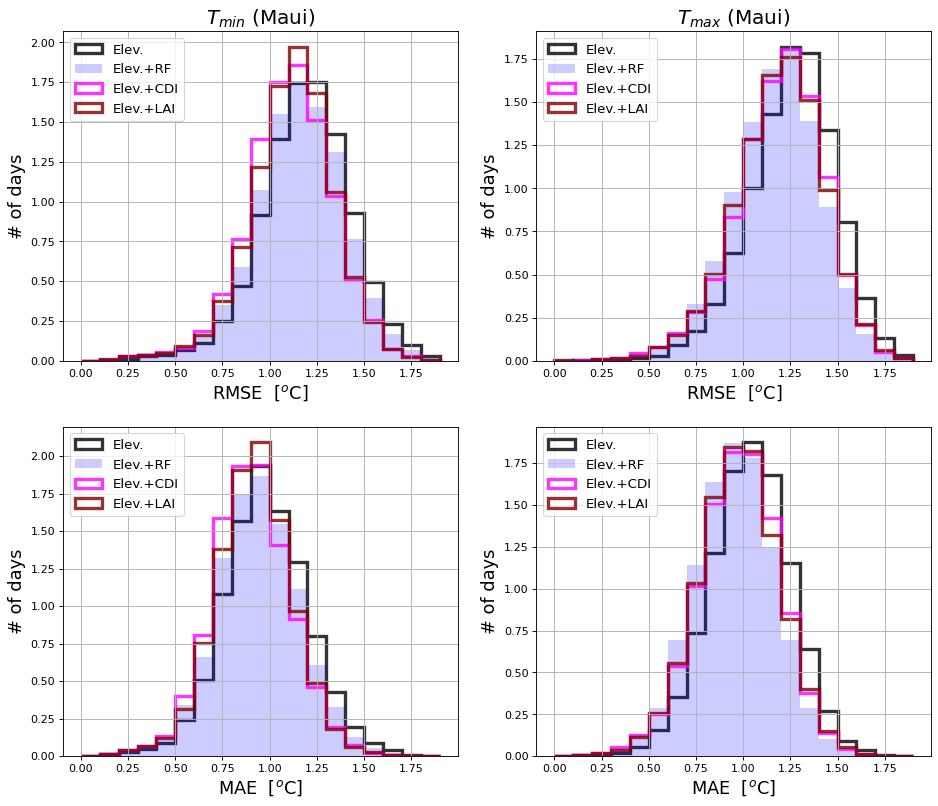

In [187]:
fig = plt.figure(figsize=(14, 12), dpi=80)
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)


fp1 = pd.read_csv("KF5/KF5_Tmin_Elev_MA_hyper.csv", sep=',')
fp2 = pd.read_csv("KF5/KF5_Tmin_Elev_RF_MA_hyper.csv", sep=',')
fp3 = pd.read_csv("KF5/KF5_Tmin_Elev_CDI_MA_hyper.csv", sep=',')
fp4 = pd.read_csv("KF5/KF5_Tmin_Elev_LAI_MA_hyper.csv", sep=',')

bins = np.arange(0,2,0.1)

fp1.RMSE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='k', label='Elev.', ax=ax1) # blue
fp2.RMSE.hist(bins=bins, density=True, alpha=0.2, lw=3, color='b', label='Elev.+RF', ax=ax1)
fp3.RMSE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='magenta', label='Elev.+CDI', ax=ax1)
fp4.RMSE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='maroon', label='Elev.+LAI', ax=ax1) # blue

ax1.set_title(r'$T_{min}$'+' (Maui)', fontsize=18)
ax1.set_xlabel('RMSE  ['+r'$^o$'+'C]', fontsize=16)
ax1.set_ylabel('# of days', fontsize=16)
ax1.legend(loc=2, fontsize=12)

#########################################################################################

fp1 = pd.read_csv("KF5/KF5_Tmax_Elev_MA_hyper.csv", sep=',')
fp2 = pd.read_csv("KF5/KF5_Tmax_Elev_RF_MA_hyper.csv", sep=',')
fp3 = pd.read_csv("KF5/KF5_Tmax_Elev_CDI_MA_hyper.csv", sep=',')
fp4 = pd.read_csv("KF5/KF5_Tmax_Elev_LAI_MA_hyper.csv", sep=',')

bins = np.arange(0,2,0.1)

fp1.RMSE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='k', label='Elev.', ax=ax2) # blue
fp2.RMSE.hist(bins=bins, density=True, alpha=0.2, lw=3, color='b', label='Elev.+RF', ax=ax2)
fp3.RMSE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='magenta', label='Elev.+CDI', ax=ax2)
fp4.RMSE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='maroon', label='Elev.+LAI', ax=ax2) # blue

ax2.set_title(r'$T_{max}$'+' (Maui)', fontsize=18)
ax2.set_xlabel('RMSE  ['+r'$^o$'+'C]', fontsize=16)
ax2.set_ylabel('# of days', fontsize=16)
ax2.legend(loc=2, fontsize=12)


#########################################################################################

fp1 = pd.read_csv("KF5/KF5_Tmin_Elev_MA_hyper.csv", sep=',')
fp2 = pd.read_csv("KF5/KF5_Tmin_Elev_RF_MA_hyper.csv", sep=',')
fp3 = pd.read_csv("KF5/KF5_Tmin_Elev_CDI_MA_hyper.csv", sep=',')
fp4 = pd.read_csv("KF5/KF5_Tmin_Elev_LAI_MA_hyper.csv", sep=',')


bins = np.arange(0,2,0.1)

fp1.MAE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='k', label='Elev.', ax=ax3) # blue
fp2.MAE.hist(bins=bins, density=True, alpha=0.2, lw=3, color='b', label='Elev.+RF', ax=ax3)
fp3.MAE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='magenta', label='Elev.+CDI', ax=ax3)
fp4.MAE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='maroon', label='Elev.+LAI', ax=ax3) # blue

ax3.set_xlabel('MAE  ['+r'$^o$'+'C]', fontsize=16)
ax3.set_ylabel('# of days', fontsize=16)
ax3.legend(loc=2, fontsize=12)

#########################################################################################

fp1 = pd.read_csv("KF5/KF5_Tmax_Elev_MA_hyper.csv", sep=',')
fp2 = pd.read_csv("KF5/KF5_Tmax_Elev_RF_MA_hyper.csv", sep=',')
fp3 = pd.read_csv("KF5/KF5_Tmax_Elev_CDI_MA_hyper.csv", sep=',')
fp4 = pd.read_csv("KF5/KF5_Tmax_Elev_LAI_MA_hyper.csv", sep=',')

bins = np.arange(0,2,0.1)

fp1.MAE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='k', label='Elev.', ax=ax4) # blue
fp2.MAE.hist(bins=bins, density=True, alpha=0.2, lw=3, color='b', label='Elev.+RF', ax=ax4)
fp3.MAE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='magenta', label='Elev.+CDI', ax=ax4)
fp4.MAE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='maroon', label='Elev.+LAI', ax=ax4) # blue

ax4.set_xlabel('MAE  ['+r'$^o$'+'C]', fontsize=16)
ax4.set_ylabel('# of days', fontsize=16)
ax4.legend(loc=2, fontsize=12)

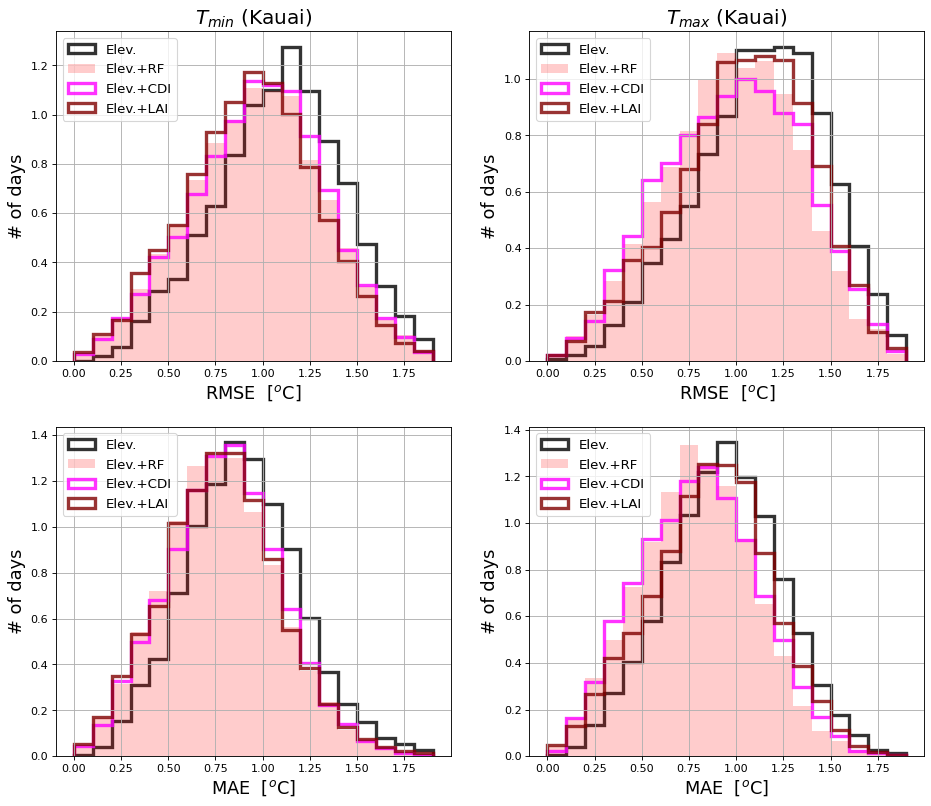

In [188]:
fig = plt.figure(figsize=(14, 12), dpi=80)
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)


fp1 = pd.read_csv("KF5/KF5_Tmin_Elev_KA_hyper.csv", sep=',')
fp2 = pd.read_csv("KF5/KF5_Tmin_Elev_RF_KA_hyper.csv", sep=',')
fp3 = pd.read_csv("KF5/KF5_Tmin_Elev_CDI_KA_hyper.csv", sep=',')
fp4 = pd.read_csv("KF5/KF5_Tmin_Elev_LAI_KA_hyper.csv", sep=',')

bins = np.arange(0,2,0.1)

fp1.RMSE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='k', label='Elev.', ax=ax1) # blue
fp2.RMSE.hist(bins=bins, density=True, alpha=0.2, lw=3, color='r', label='Elev.+RF', ax=ax1)
fp3.RMSE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='magenta', label='Elev.+CDI', ax=ax1)
fp4.RMSE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='maroon', label='Elev.+LAI', ax=ax1) # blue

ax1.set_title(r'$T_{min}$'+' (Kauai)', fontsize=18)
ax1.set_xlabel('RMSE  ['+r'$^o$'+'C]', fontsize=16)
ax1.set_ylabel('# of days', fontsize=16)
ax1.legend(loc=2, fontsize=12)

#########################################################################################

fp1 = pd.read_csv("KF5/KF5_Tmax_Elev_KA_hyper.csv", sep=',')
fp2 = pd.read_csv("KF5/KF5_Tmax_Elev_RF_KA_hyper.csv", sep=',')
fp3 = pd.read_csv("KF5/KF5_Tmax_Elev_CDI_KA_hyper.csv", sep=',')
fp4 = pd.read_csv("KF5/KF5_Tmax_Elev_LAI_KA_hyper.csv", sep=',')

bins = np.arange(0,2,0.1)

fp1.RMSE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='k', label='Elev.', ax=ax2) # blue
fp2.RMSE.hist(bins=bins, density=True, alpha=0.2, lw=3, color='r', label='Elev.+RF', ax=ax2)
fp3.RMSE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='magenta', label='Elev.+CDI', ax=ax2)
fp4.RMSE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='maroon', label='Elev.+LAI', ax=ax2) # blue

ax2.set_title(r'$T_{max}$'+' (Kauai)', fontsize=18)
ax2.set_xlabel('RMSE  ['+r'$^o$'+'C]', fontsize=16)
ax2.set_ylabel('# of days', fontsize=16)
ax2.legend(loc=2, fontsize=12)


#########################################################################################

fp1 = pd.read_csv("KF5/KF5_Tmin_Elev_KA_hyper.csv", sep=',')
fp2 = pd.read_csv("KF5/KF5_Tmin_Elev_RF_KA_hyper.csv", sep=',')
fp3 = pd.read_csv("KF5/KF5_Tmin_Elev_CDI_KA_hyper.csv", sep=',')
fp4 = pd.read_csv("KF5/KF5_Tmin_Elev_LAI_KA_hyper.csv", sep=',')


bins = np.arange(0,2,0.1)

fp1.MAE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='k', label='Elev.', ax=ax3) # blue
fp2.MAE.hist(bins=bins, density=True, alpha=0.2, lw=3, color='r', label='Elev.+RF', ax=ax3)
fp3.MAE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='magenta', label='Elev.+CDI', ax=ax3)
fp4.MAE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='maroon', label='Elev.+LAI', ax=ax3) # blue

ax3.set_xlabel('MAE  ['+r'$^o$'+'C]', fontsize=16)
ax3.set_ylabel('# of days', fontsize=16)
ax3.legend(loc=2, fontsize=12)

#########################################################################################

fp1 = pd.read_csv("KF5/KF5_Tmax_Elev_KA_hyper.csv", sep=',')
fp2 = pd.read_csv("KF5/KF5_Tmax_Elev_RF_KA_hyper.csv", sep=',')
fp3 = pd.read_csv("KF5/KF5_Tmax_Elev_CDI_KA_hyper.csv", sep=',')
fp4 = pd.read_csv("KF5/KF5_Tmax_Elev_LAI_KA_hyper.csv", sep=',')

bins = np.arange(0,2,0.1)

fp1.MAE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='k', label='Elev.', ax=ax4) # blue
fp2.MAE.hist(bins=bins, density=True, alpha=0.2, lw=3, color='r', label='Elev.+RF', ax=ax4)
fp3.MAE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='magenta', label='Elev.+CDI', ax=ax4)
fp4.MAE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='maroon', label='Elev.+LAI', ax=ax4) # blue

ax4.set_xlabel('MAE  ['+r'$^o$'+'C]', fontsize=16)
ax4.set_ylabel('# of days', fontsize=16)
ax4.legend(loc=2, fontsize=12)

Text(0, 0.5, '# of days')

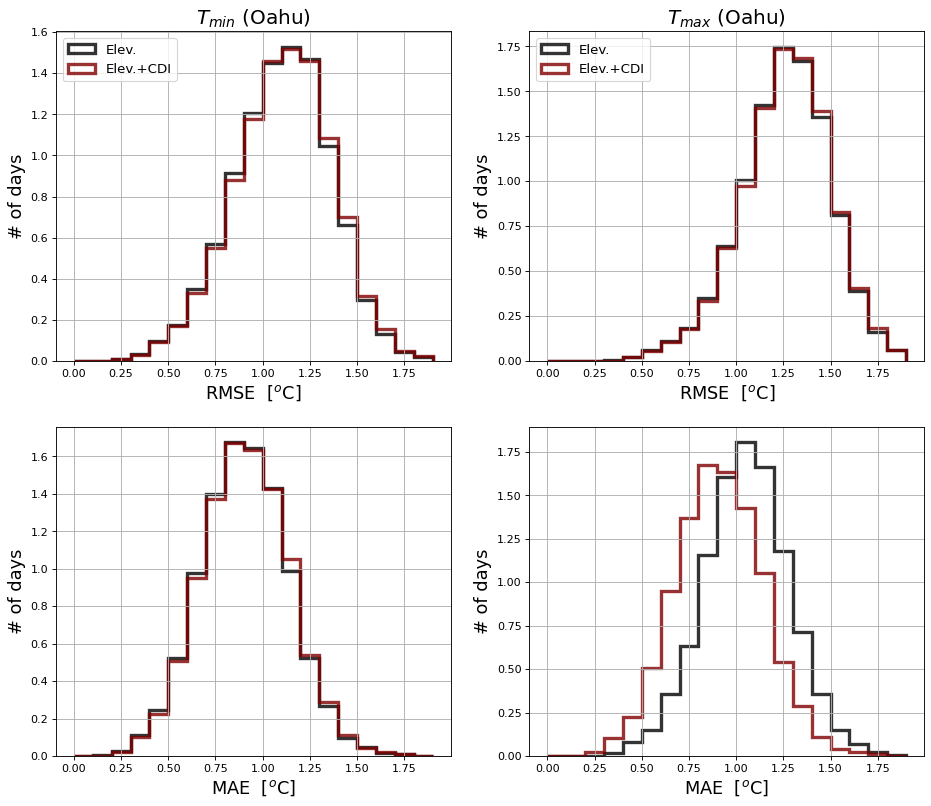

In [9]:
fig = plt.figure(figsize=(14, 12), dpi=80)
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

#########################################################################################

fp1 = pd.read_csv("Tmin_Elev_OA_hyper.csv", sep=',')
fp4 = pd.read_csv("Tmin_Elev_Coast_OA_hyper.csv", sep=',')

bins = np.arange(0,2,0.1)

fp1.RMSE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='k', label='Elev.', ax=ax1) # blue
# fp2.RMSE.hist(bins=bins, density=True, alpha=0.2, lw=3, color='g', label='Elev.+RF', ax=ax1)
# fp3.RMSE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='magenta', label='Elev.+RF+WS', ax=ax1)
fp4.RMSE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='maroon', label='Elev.+CDI', ax=ax1) # blue


ax1.set_title(r'$T_{min}$'+' (Oahu)', fontsize=18)
ax1.set_xlabel('RMSE  ['+r'$^o$'+'C]', fontsize=16)
ax1.set_ylabel('# of days', fontsize=16)
ax1.legend(loc=2, fontsize=12)

#########################################################################################

fp1 = pd.read_csv("Tmax_Elev_OA_hyper.csv", sep=',')
fp4 = pd.read_csv("Tmax_Elev_Coast_OA_hyper.csv", sep=',')

bins = np.arange(0,2,0.1)

fp1.RMSE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='k', label='Elev.', ax=ax2) # blue
# fp2.RMSE.hist(bins=bins, density=True, alpha=0.5, lw=3, color='g', label='Elev.+RF', ax=ax2)
# fp3.RMSE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='magenta', label='Elev.+RF+WS', ax=ax2)
fp4.RMSE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='maroon', label='Elev.+CDI', ax=ax2) # blue

ax2.set_title(r'$T_{max}$'+' (Oahu)', fontsize=18)
ax2.set_xlabel('RMSE  ['+r'$^o$'+'C]', fontsize=16)
ax2.set_ylabel('# of days', fontsize=16)
ax2.legend(loc=2, fontsize=12)

#########################################################################################

fp1 = pd.read_csv("Tmin_Elev_OA_hyper.csv", sep=',')
fp4 = pd.read_csv("Tmin_Elev_Coast_OA_hyper.csv", sep=',')

bins = np.arange(0,2,0.1)

fp1.MAE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='k', label='Elev.', ax=ax3) # blue
# fp2.MAE.hist(bins=bins, density=True, alpha=0.2, lw=3, color='g', label='Elev.+RF', ax=ax3)
# fp3.MAE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='magenta', label='Elev.+RF+WS', ax=ax3)
fp4.MAE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='maroon', label='Elev.+CDI', ax=ax3) # blue

# ax3.set_title(r'$T_{min}$'+' (Oahu)', fontsize=18)
ax3.set_xlabel('MAE  ['+r'$^o$'+'C]', fontsize=16)
ax3.set_ylabel('# of days', fontsize=16)
# ax3.legend(loc=2, fontsize=12)

#########################################################################################

fp1 = pd.read_csv("Tmax_Elev_OA_hyper.csv", sep=',')
fp2 = pd.read_csv("Tmax_Elev_Coast_OA_hyper.csv", sep=',')

bins = np.arange(0,2,0.1)

fp1.MAE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='k', label='Elev.', ax=ax4) # blue
# fp2.MAE.hist(bins=bins, density=True, alpha=0.5, lw=3, color='g', label='Elev.+RF', ax=ax4)
# fp3.MAE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='magenta', label='Elev.+RF+WS', ax=ax4)
fp4.MAE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='maroon', label='Elev.+CDI', ax=ax4) # blue


# ax4.set_title(r'$T_{max}$'+' (Oahu)', fontsize=18)
ax4.set_xlabel('MAE  ['+r'$^o$'+'C]', fontsize=16)
ax4.set_ylabel('# of days', fontsize=16)
# ax4.legend(loc=2, fontsize=12)

Text(0, 0.5, '# of days')

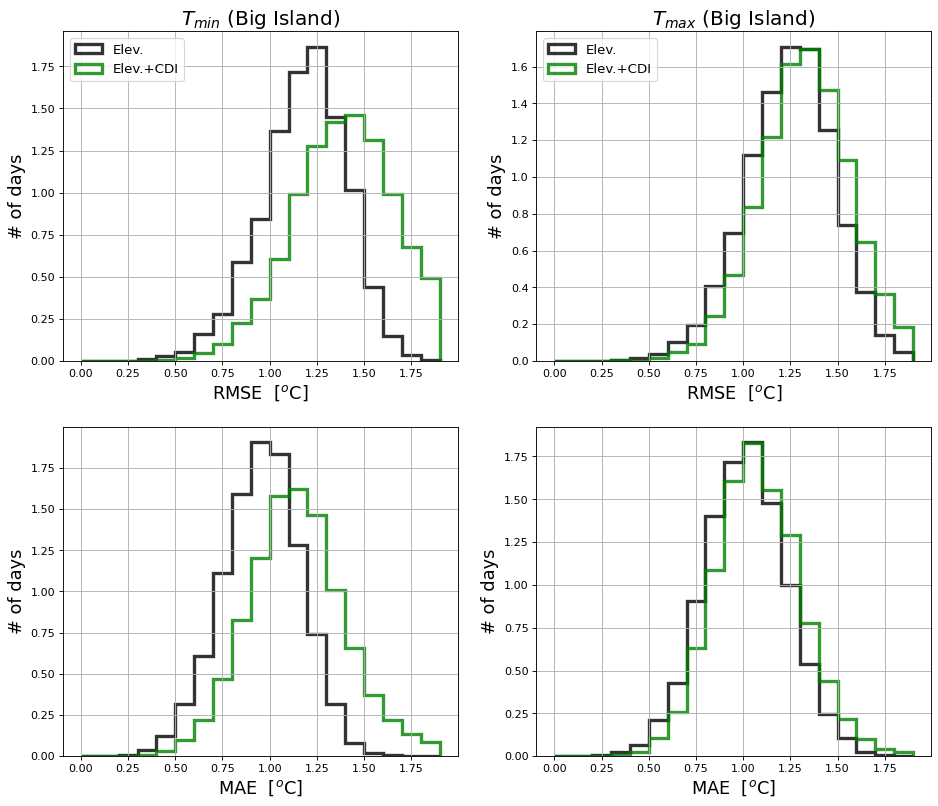

In [10]:
fig = plt.figure(figsize=(14, 12), dpi=80)
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)


fp1 = pd.read_csv("Tmin_Elev_BI_hyper.csv", sep=',')
# fp2 = pd.read_csv("Tmin_Elev_RF_BI_hyper.csv", sep=',')
# fp3 = pd.read_csv("Tmin_Elev_RF_WS_BI_hyper.csv", sep=',')
fp4 = pd.read_csv("Tmin_Elev_Coast_BI_hyper.csv", sep=',')

bins = np.arange(0,2,0.1)

fp1.RMSE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='k', label='Elev.', ax=ax1) # blue
# fp2.RMSE.hist(bins=bins, density=True, alpha=0.2, lw=3, color='y', label='Elev.+RF', ax=ax1)
# fp3.RMSE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='magenta', label='Elev.+RF+WS', ax=ax1)
fp4.RMSE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='g', label='Elev.+CDI', ax=ax1) # blue

ax1.set_title(r'$T_{min}$'+' (Big Island)', fontsize=18)
ax1.set_xlabel('RMSE  ['+r'$^o$'+'C]', fontsize=16)
ax1.set_ylabel('# of days', fontsize=16)
ax1.legend(loc=2, fontsize=12)

#########################################################################################

fp1 = pd.read_csv("Tmax_Elev_BI_hyper.csv", sep=',')
# fp2 = pd.read_csv("Tmax_Elev_RF_BI_hyper.csv", sep=',')
# fp3 = pd.read_csv("Tmax_Elev_RF_WS_BI_hyper.csv", sep=',')
fp4 = pd.read_csv("Tmax_Elev_Coast_BI_hyper.csv", sep=',')

bins = np.arange(0,2,0.1)

fp1.RMSE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='k', label='Elev.', ax=ax2) # blue
# fp2.RMSE.hist(bins=bins, density=True, alpha=0.5, lw=3, color='y', label='Elev.+RF', ax=ax2)
# fp3.RMSE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='magenta', label='Elev.+RF+WS', ax=ax2)
fp4.RMSE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='g', label='Elev.+CDI', ax=ax2) # blue

ax2.set_title(r'$T_{max}$'+' (Big Island)', fontsize=18)
ax2.set_xlabel('RMSE  ['+r'$^o$'+'C]', fontsize=16)
ax2.set_ylabel('# of days', fontsize=16)
ax2.legend(loc=2, fontsize=12)

#########################################################################################

fp1 = pd.read_csv("Tmin_Elev_BI_hyper.csv", sep=',')
# fp2 = pd.read_csv("Tmin_Elev_RF_BI_hyper.csv", sep=',')
# fp3 = pd.read_csv("Tmin_Elev_RF_WS_BI_hyper.csv", sep=',')
fp4 = pd.read_csv("Tmin_Elev_Coast_BI_hyper.csv", sep=',')

bins = np.arange(0,2,0.1)

fp1.MAE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='k', label='Elev.', ax=ax3) # blue
# fp2.MAE.hist(bins=bins, density=True, alpha=0.2, lw=3, color='y', label='Elev.+RF', ax=ax3)
# fp3.MAE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='magenta', label='Elev.+RF+WS', ax=ax3)
fp4.MAE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='g', label='Elev.+CDI', ax=ax3) # blue

ax3.set_xlabel('MAE  ['+r'$^o$'+'C]', fontsize=16)
ax3.set_ylabel('# of days', fontsize=16)
# ax3.legend(loc=2, fontsize=12)

#########################################################################################

fp1 = pd.read_csv("Tmax_Elev_BI_hyper.csv", sep=',')
# fp2 = pd.read_csv("Tmax_Elev_RF_BI_hyper.csv", sep=',')
# fp3 = pd.read_csv("Tmax_Elev_RF_WS_BI_hyper.csv", sep=',')
fp4 = pd.read_csv("Tmax_Elev_Coast_BI_hyper.csv", sep=',')

bins = np.arange(0,2,0.1)

fp1.MAE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='k', label='Elev.', ax=ax4) # blue
# fp2.MAE.hist(bins=bins, density=True, alpha=0.5, lw=3, color='y', label='Elev.+RF', ax=ax4)
# fp3.MAE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='magenta', label='Elev.+RF+WS', ax=ax4)
fp4.MAE.hist(bins=bins, density=True, alpha=0.8, histtype='step', lw=3, color='g', label='Elev.+CDI', ax=ax4) # blue

ax4.set_xlabel('MAE  ['+r'$^o$'+'C]', fontsize=16)
ax4.set_ylabel('# of days', fontsize=16)
# ax4.legend(loc=2, fontsize=12)

In [247]:
import glob

print(glob.glob("KF5/KF5*Tmin*OA*csv"))

['KF5/KF5_Tmin_Elev_CDI_LAI_RF180_OA_hyper.csv', 'KF5/KF5_Tmin_Elev_CDI_LAI_WS_OA_hyper.csv', 'KF5/KF5_Tmin_Elev_RF_OA_hyper.csv', 'KF5/KF5_Tmin_Elev_CDI_LAI_WS_RF180OA_hyper.csv', 'KF5/KF5_Tmin_Elev_CDI_LAI_WS_ALBEDO_TPI_OA_hyper.csv', 'KF5/KF5_Tmin_Elev_CDI_LAI_OA_hyper.csv', 'KF5/KF5_Tmin_Elev_CDI_LAI_ALBEDO_OA_hyper.csv', 'KF5/KF5_Tmin_Elev_OA_hyper.csv', 'KF5/KF5_Tmin_Elev_CDI_LAI_TPI_RF180_OA_hyper.csv', 'KF5/KF5_Tmin_Elev_RF180_OA_hyper.csv', 'KF5/KF5_Tmin_Elev_CDI_LAI_WS_RF180_TPI_OA_hyper.csv', 'KF5/KF5_Tmin_Elev_CDI_LAI_ALBEDO_TPI_OA_hyper.csv', 'KF5/KF5_Tmin_Elev_CDI_LAI_WS_RF180_OA_hyper.csv', 'KF5/KF5_Tmin_Elev_LAI_OA_hyper.csv', 'KF5/KF5_Tmin_Elev_CDI_LAI_TPI_OA_hyper.csv', 'KF5/KF5_Tmin_Elev_CDI_OA_hyper.csv']


In [248]:
df = pd.read_csv("KF5/KF5_Tmin_Elev_OA_hyper.csv", sep=',')

df.head()

,MAE,RMSE,R2,AIC,BIC,t0,t1,t2
0,0.895396,1.061794,0.574869,7.319112,8.512798,24.624527,-0.005871,0.0
1,0.948348,1.195591,0.485281,9.930091,11.123777,24.273552,-0.005520,0.0
2,1.106520,1.322314,0.350785,12.146426,13.340112,23.516623,-0.004622,0.0
3,0.615589,0.766665,0.600782,0.154471,1.348157,23.676526,-0.004472,0.0
4,0.948986,1.229622,0.339554,10.547550,11.741235,23.498214,-0.004193,0.0


In [249]:
col = "MAE"
mean = df[[col]].describe().loc["mean"].values[0]
std  = df[[col]].describe().loc["std"].values[0]

mean, std

(0.9044554706598985, 0.2327251316478495)

In [277]:
def ranker(string):
    
    l = string.split("+")
    N = len(l)*100
    
    P = 0
    for _ in l: 
        P+=sorter2(_)
        
    return P+N
    
    

def sorter2(param):
    
    if param == 'ELE':
        return 1
    elif param == 'CDI':
        return 2
    elif param == 'RF':
        return 5
    elif param == 'RFF':
        return 7
    elif param == 'LAI':
        return 10
    elif param == 'ALB':
        return 10
    elif param == 'TPI':
        return 12
    elif param == 'WSP':
        return 17
    return 0    
    
    
def sorter(param):
    
    if param == 'Elev':
        return 'ELE', 0
    elif param == 'RF':
        return param, 2
    elif param == 'RF180':
        return 'RFF', 3
    elif param == 'CDI':
        return param, 1
    elif param == 'LAI':
        return param, 4
    elif param == 'ALBEDO':
        return 'ALB', 5
    elif param == 'TPI':
        return param, 6
    elif param == 'WS':
        return 'WSP', 7
    return None

def sorterL(params):
    
    N = 8   # the number of all possible parameters
    n = len(params)
    l = [None]*N
    
    for p in params:
        p_, i = sorter(p)
        l[i] = p_
    return l
    

def l2str(l):
    
    s = []
    n = len(l)
    for _ in l:
        if not _ is None:
            s.append(_)
    
    strg = ""
    for _ in s[:-1]:
        strg+=_+"+"
    strg+=s[-1]
         
    return strg

In [306]:
def generateStats(files, column):
    
    mList = []

    for model in files:

        df = pd.read_csv(model, sep=',')

        mean = df[[column]].describe().loc["mean"].values[0]
        std  = df[[column]].describe().loc["std"].values[0]

        params = model.split("_")[2:-2]
        string = l2str(sorterL(params))

        mList.append((ranker(string), string, mean, std))



    mList.sort(key=lambda l: l[0])

    return mList



In [310]:
def islandCode(code):
    
    if code == 'OA':
        return 'Oahu'
    elif code == 'MA':
        return 'Maui'
    elif code == 'BI':
        return 'Big Island'
    elif code == 'KA':
        return 'Kauai'
    
    

In [454]:
def panelPlot(ax, files, column, title, showLabels=False, fmt='o', indDict=None):
    
    mList = generateStats(files, column)
    N = len(mList)
    
    for i in range(N):
        item = mList[i]
        if indDict is None:
            ax.errorbar(item[2], i, xerr=item[3], fmt=fmt)
        else:
            ax.errorbar(item[2], indDict[item[1]], xerr=item[3]*0, fmt=fmt, color='k')

    if showLabels and indDict is None:
        ax.set_yticks(range(N))
        ax.set_yticklabels([l[1]+'    '+str(i) for i, l in enumerate(mList)] , rotation=0, fontsize=12)
    
    if indDict is None:
        ax.set_xlabel(column, fontsize=14)
        ax.set_title(title, fontsize=18)
        ax.axvline(x=mList[0][2], ls=":") 
    
    return mList

In [455]:
def rowPlot(axList, code, mode, template, fmt='o', indDict=None):

    island = islandCode(code)
    files = glob.glob(template)
    title = r'$T_{'+mode+'}$'+' ('+island+')'

    column = "MAE"; ax=axList[0]
    mList = panelPlot(ax, files, column, title, showLabels=True, fmt=fmt, indDict=indDict)
    ax.set_xlabel(column+'  ['+r'$^o$'+'C]', fontsize=16)
    ax.set_xlim(0,1.8)

    column = "RMSE"; ax=axList[1]
    panelPlot(ax, files, column, title, fmt=fmt, indDict=indDict)
    ax.set_xlabel(column+'  ['+r'$^o$'+'C]', fontsize=14)
    ax.set_xlim(0,1.8)
    
    column = "R2"; ax=axList[2]
    panelPlot(ax, files, column, title, fmt=fmt, indDict=indDict)
    ax.set_xlabel(r'$R^2$', fontsize=14)
    ax.set_xlim(0.2,1)

    column = "AIC"; ax=axList[3]
    panelPlot(ax, files, column, title, fmt=fmt, indDict=indDict)
    ax.set_xlabel(column, fontsize=14)
    
    column = "BIC"; ax=axList[4]
    panelPlot(ax, files, column, title, fmt=fmt, indDict=indDict)
    ax.set_xlabel(column, fontsize=14)
    
    if indDict is None:
        indDict = {}
        for i, item in enumerate(mList):
            indDict[item[1]] = i
    
    return indDict

In [464]:
KF5 = "KF5/KF5*T"+mode+"*"+code+"*csv"
LOO = "LOO/LOO*T"+mode+"*"+code+"*csv"

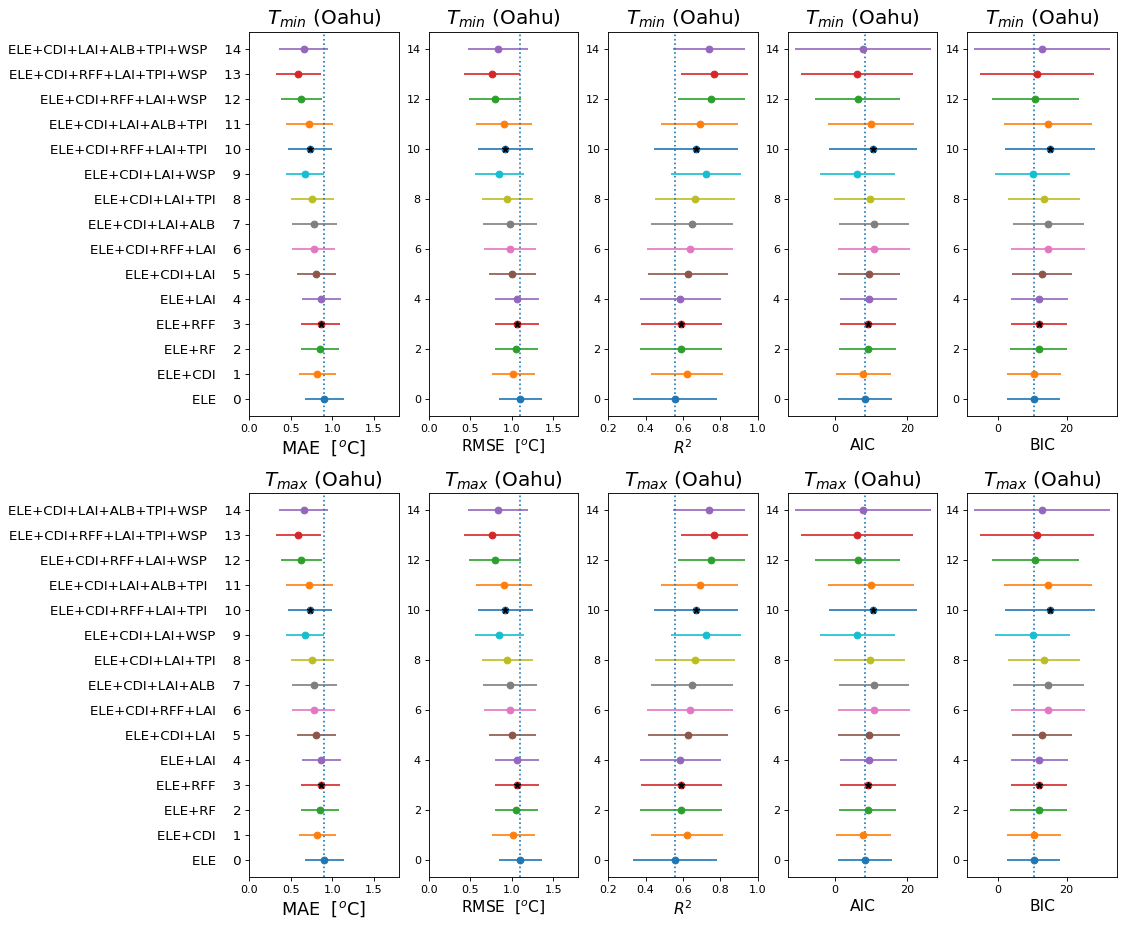

In [465]:
fig = plt.figure(figsize=(14, 14), dpi=80)
TOPax = [fig.add_subplot(2, 5, i) for i in range(1,6)]
BOTax = [fig.add_subplot(2, 5, i) for i in range(6,11)]

island = 'OA'

indDict = rowPlot(TOPax, island, 'min', KF5)
indDict = rowPlot(TOPax, island, 'min', LOO, fmt='*', indDict=indDict)


indDict = rowPlot(BOTax, island, 'max', KF5)
indDict = rowPlot(BOTax, island, 'min', LOO, fmt='*', indDict=indDict)

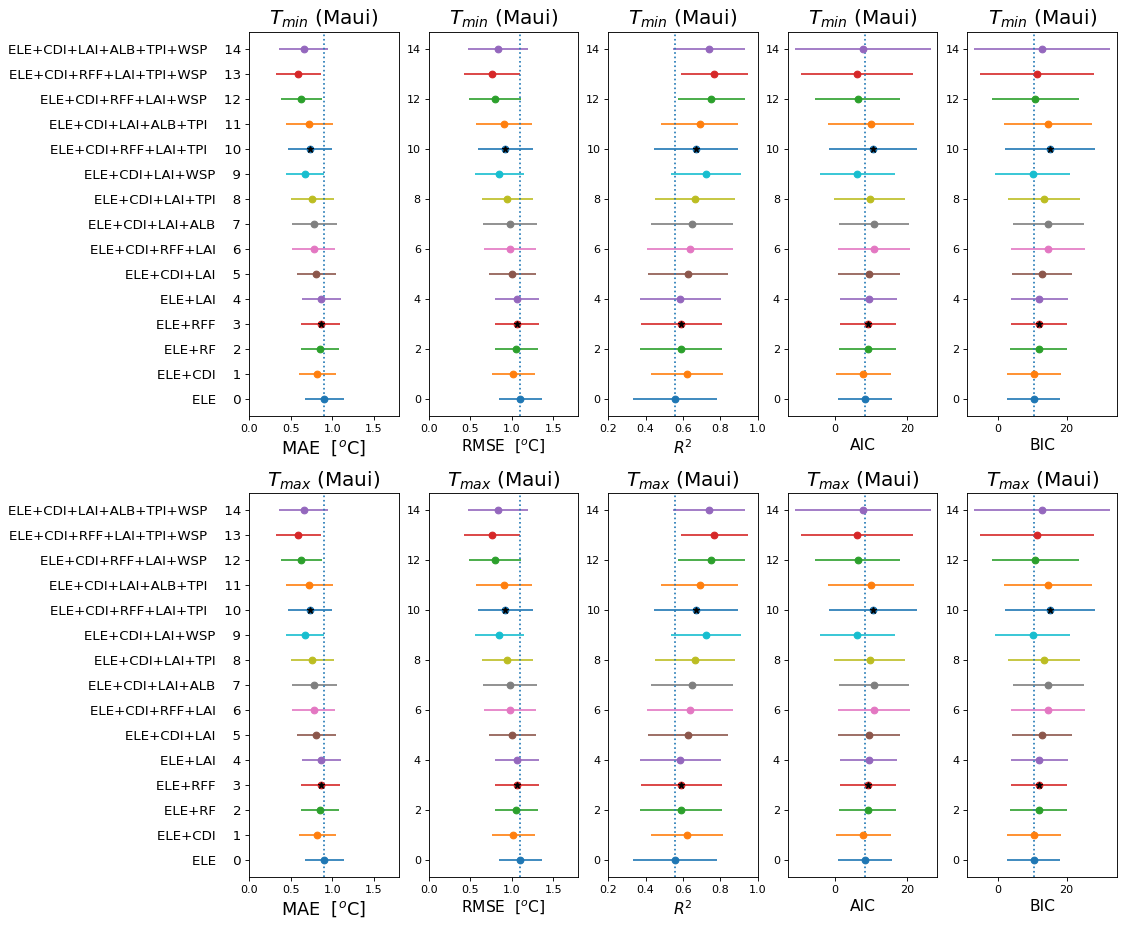

In [466]:
fig = plt.figure(figsize=(14, 14), dpi=80)
TOPax = [fig.add_subplot(2, 5, i) for i in range(1,6)]
BOTax = [fig.add_subplot(2, 5, i) for i in range(6,11)]

island = 'MA'

indDict = rowPlot(TOPax, island, 'min', KF5)
indDict = rowPlot(TOPax, island, 'min', LOO, fmt='*', indDict=indDict)


indDict = rowPlot(BOTax, island, 'max', KF5)
indDict = rowPlot(BOTax, island, 'min', LOO, fmt='*', indDict=indDict)

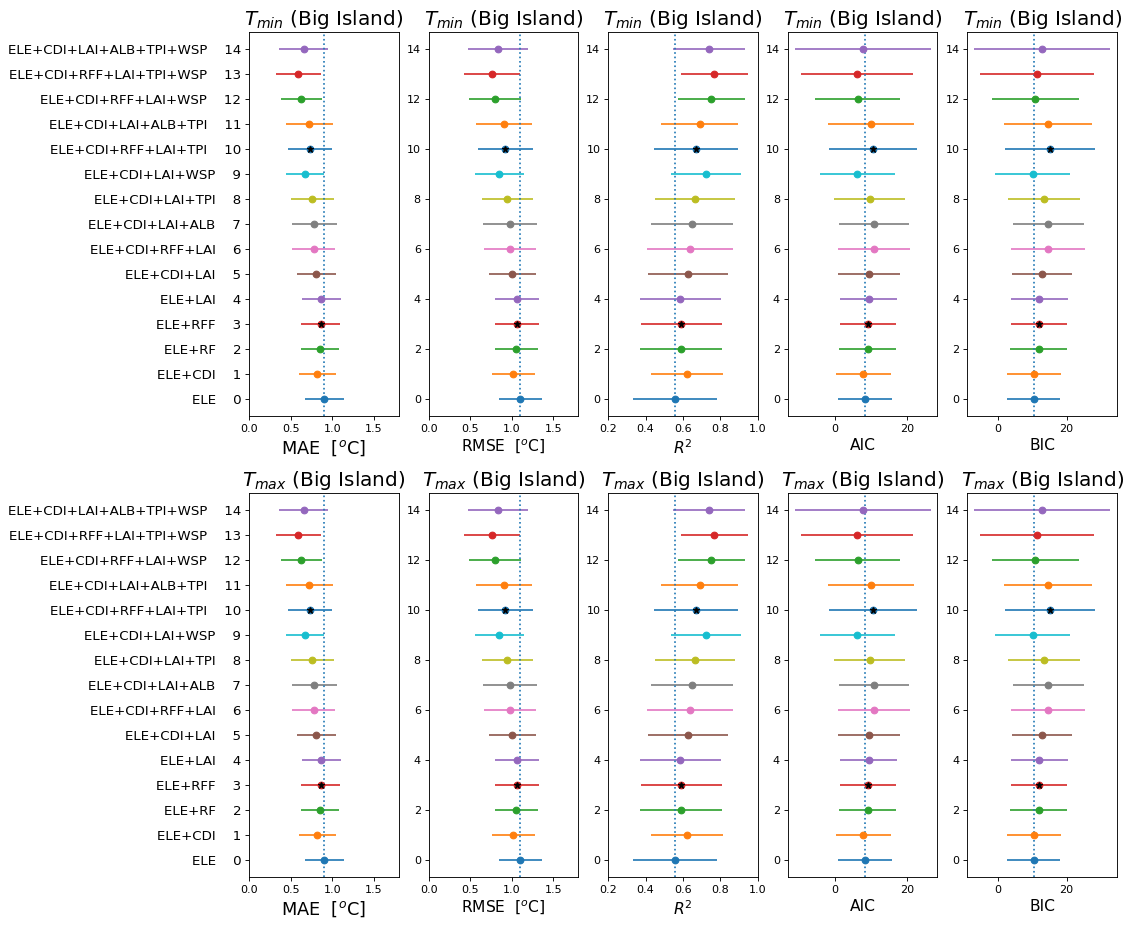

In [467]:
fig = plt.figure(figsize=(14, 14), dpi=80)
TOPax = [fig.add_subplot(2, 5, i) for i in range(1,6)]
BOTax = [fig.add_subplot(2, 5, i) for i in range(6,11)]

island = 'BI'

indDict = rowPlot(TOPax, island, 'min', KF5)
indDict = rowPlot(TOPax, island, 'min', LOO, fmt='*', indDict=indDict)


indDict = rowPlot(BOTax, island, 'max', KF5)
indDict = rowPlot(BOTax, island, 'min', LOO, fmt='*', indDict=indDict)

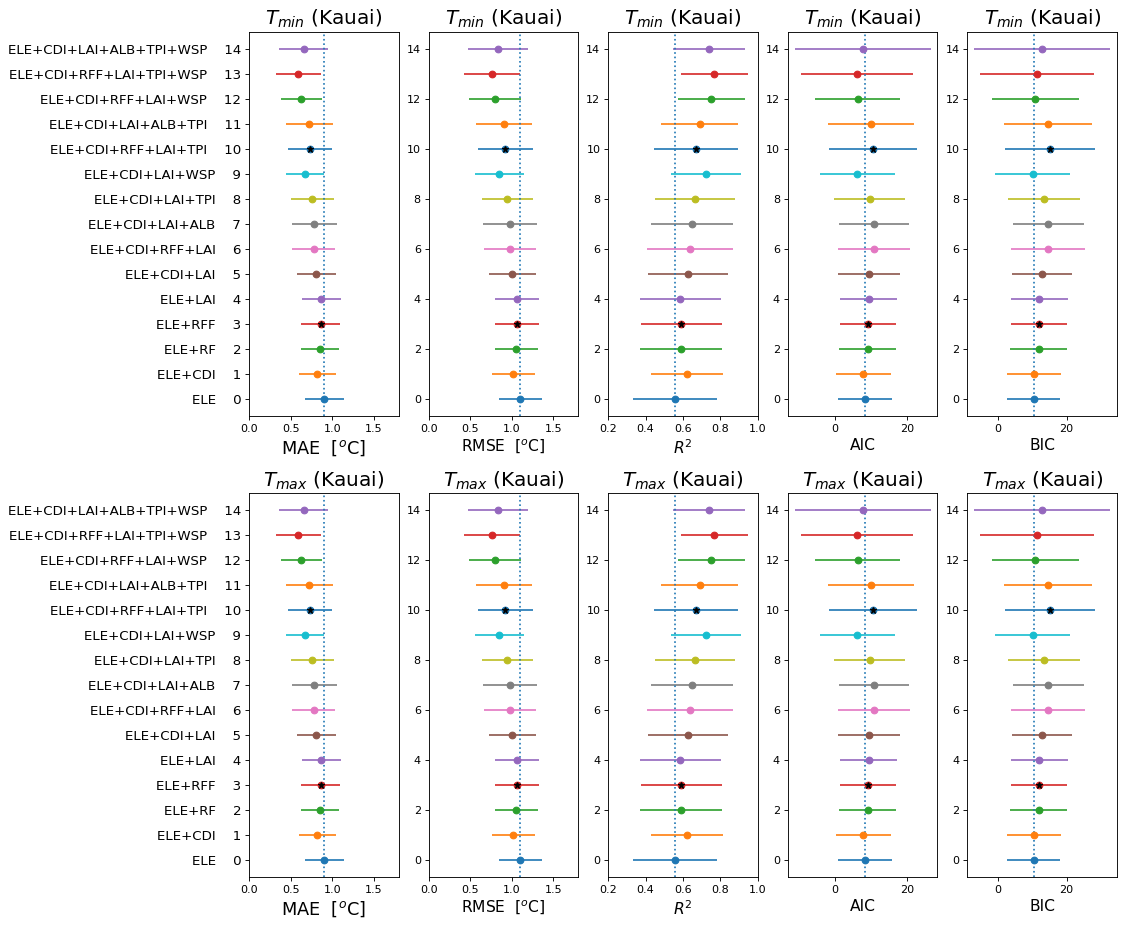

In [468]:
fig = plt.figure(figsize=(14, 14), dpi=80)
TOPax = [fig.add_subplot(2, 5, i) for i in range(1,6)]
BOTax = [fig.add_subplot(2, 5, i) for i in range(6,11)]

island = 'KA'

indDict = rowPlot(TOPax, island, 'min', KF5)
indDict = rowPlot(TOPax, island, 'min', LOO, fmt='*', indDict=indDict)


indDict = rowPlot(BOTax, island, 'max', KF5)
indDict = rowPlot(BOTax, island, 'min', LOO, fmt='*', indDict=indDict)